In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import plotly.express as px
import random

👉 Tiếp đến đọc file `"Sample - Superstore.csv"` vào dataframe `df` và in ra 5 dòng đầu tiên của dataframe.

In [3]:
# Tên file chứa data
DATA_FILE_NAME = "Sample - Superstore.csv"
df = pd.read_csv(DATA_FILE_NAME, encoding= 'unicode_escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
cat_columns  = df.select_dtypes(['object']).columns
num_columns  = df.select_dtypes(['number']).columns
print(cat_columns)
print(num_columns)

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')
Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [6]:
for col in cat_columns:
    print(len(set(df[col])), '---- ', col)
print()
for col in num_columns:
    print(len(set(df[col])), '---- ', col)

5009 ----  Order ID
1237 ----  Order Date
1334 ----  Ship Date
4 ----  Ship Mode
793 ----  Customer ID
793 ----  Customer Name
3 ----  Segment
1 ----  Country
531 ----  City
49 ----  State
4 ----  Region
1862 ----  Product ID
3 ----  Category
17 ----  Sub-Category
1850 ----  Product Name

9994 ----  Row ID
631 ----  Postal Code
5825 ----  Sales
14 ----  Quantity
12 ----  Discount
7287 ----  Profit


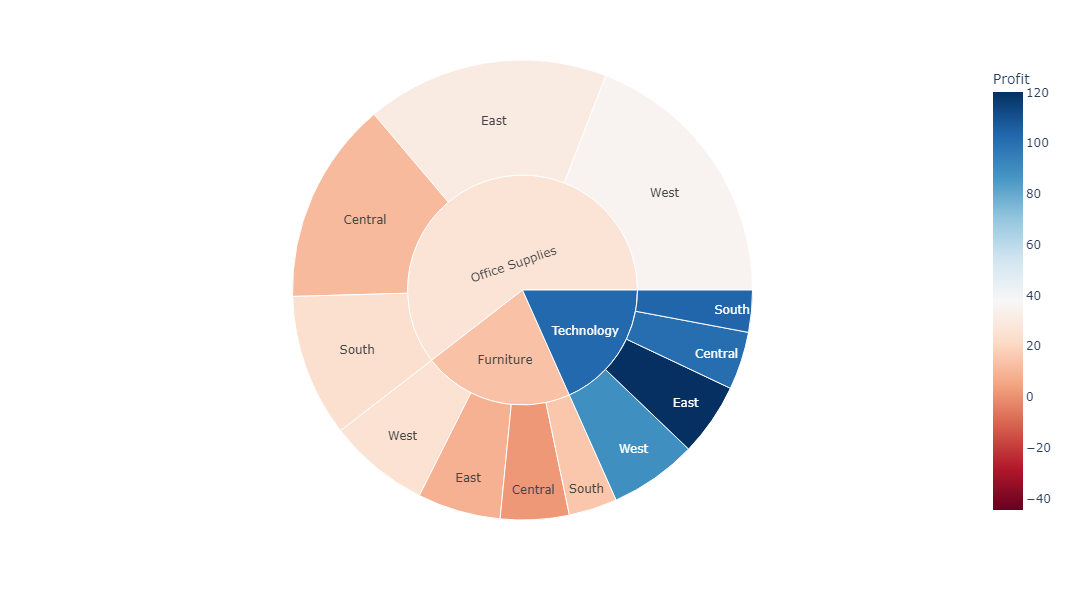

In [25]:
fig = px.sunburst(df, path=['Category','Region'], values='Quantity',
                  color='Profit', 
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Profit'], weights=df['Quantity']),
                  width=1000, height=600)
fig.show()

**Nhận xét:**
- Nhìn chung, tất cả các mặt hàng đều có lợi nhuận dương, nhưng ngoài Technology, tổng lợi nhuận của Furniture và Office Supplies không cao lắm.
- Trong 3 loại mặt hàng, Technology là có lợi nhuận cao nhất và rất vượt trội so với các loại mặt hàng còn lại (trên 100, gấp gần 5 lần Office supplies và gấp gần 8 lần Furniture), mặc dù số lượng bán ra là thấp nhất.
    - Công nghệ giúp tăng năng xuất làm việc cho các công ty.
    - Lý do là do nguồn cung và nhu cầu sử dụng các sản phẩm công nghệ đang rất cao. Nhu cầu ngày càng cao với những nhân viên trình độ cao làm trong lĩnh vực càng nâng cấp sự cạnh tranh, và không ngừng xuất hiện những sản phẩm mới. Thêm nữa, công nghệ là ngành đang rất phát triển, tác động của công nghệ sẽ khiến cho nó có lãi và là thị trường hấp dẫn thu hút các nhà đầu tư, các doanh nghiệp cũng như người lao động.
- Technology ở East region cho giá trị lợi nhuận cao nhất. Một vài lý do dự đoán:
    - Thị trường ở East coast có điều kiện phát triển. Đây là nơi có các thành phố lớn: Boston, New York; Nơi có các đại học danh giá về khoa học công nghệ: MIT, Harvard, Yale. 
- Số lượng bán ra của Office Supplies rất cao, gấp hơn 1.5 lần so với tổng số lượng hai mặt hàng còn lại. 
    => Mặt hàng này dễ bán nhưng lợi nhuận thu được chỉ ở mức trung bình.

**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: dùng màu sắc để thể hiện cho lợi nhuận từ thấp đến cao (các giá trị dương và âm):
    - Màu đỏ: ngày có lợi nhuận âm.
    - Màu xanh: ngày có lợi nhuận dương.
    - Các màu sắc có sắc độ càng 
    
- ***Kỹ thuật Manipulate View:***
  + Tương tác trực tiếp với tooltip, hiển thị các giá trị về Quantity và Profit khi trỏ vào đối tượng.
  + Cho phép người dùng khi bấm chọn một đối tượng cha, sẽ hiển thị một view mới thể hiện tỉ lệ phần trăm của các đối tượng con của nó.
      VD: Bấm chọn West -> hiển thị một view mới, với vòng tròn trong là Technology, 4 region chia nhau vòng tròn ngoài để hiển thị giá trị.
  
=> Những kỹ thuật này giúp đồ thị vẫn giữ được sự rõ ràng, trực quan, tương tác thân thiện.